<a href="https://colab.research.google.com/github/williambjames/nflFastR/blob/master/Optimal_garbage_time_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [ ]:
df = pd.DataFrame()
YEARS = list(range(2010,2021))
for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    df = df.append(i_data)

In [ ]:
style.use('fivethirtyeight')

In [ ]:
df['win'] = 0 #Create new column to track wins
df.loc[(df['result']>0),'win'] = 1 #If result is positive, it means home_team won the game
df.loc[(df['result']==0),'win'] = .5 #Result of 0 equals a tie

In [ ]:
buffer = 0 #create variable to run loop on, this will serve as the buffer for our garbage time
r2 = []  #list of R^2 of non-vegas WP
r2_v = [] #list of R^2 of Vegas WP
wps = []  #list of win probabily buffer
while buffer <= .30: #this means we will test every range from 0-100 to 30-70
  df2 = df.loc[(df['home_wp'].between(buffer,1-buffer,inclusive=True)) & (df['home_team']==df['posteam'])].groupby(['game_id'],as_index=False).agg({'epa':'mean','win':'mean'}) #group by game, find the mean epa from the data filtered by WP buffer and check if it was a win or not
  correlation_matrix = np.corrcoef(df2.epa, df2.win) # find R^2
  correlation_xy = correlation_matrix[0,1] # '''
  r_squared = correlation_xy**2 #  '''
  wps.append(buffer) #add this buffer value to list
  r2.append(r_squared) #add r2 to list
  #Now for vegas
  df3 = df.loc[(df['vegas_home_wp'].between(buffer,1-buffer,inclusive=True)) & (df['home_team']==df['posteam'])].groupby(['game_id'],as_index=False).agg({'epa':'mean','win':'mean'})
  correlation_matrix_v = np.corrcoef(df3.epa, df3.win)
  correlation_xy_v = correlation_matrix_v[0,1]
  r_squared_v = correlation_xy_v**2

  r2_v.append(r_squared_v)

  buffer+=.01 #increment buffer

Text(0.77, 0.04, 'Data: nflfastR | Plot: @wbjames_')

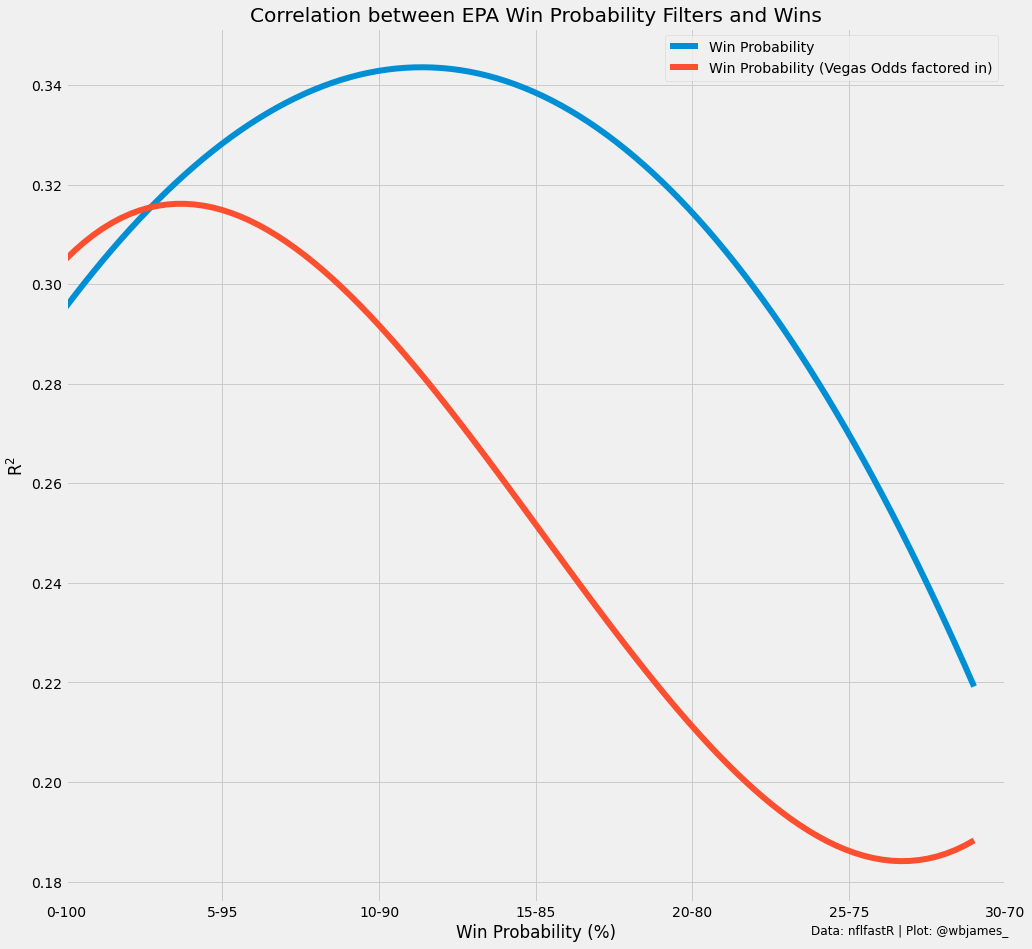

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) #create figure
plt.title('Correlation between EPA Win Probability Filters and Wins')

sns.regplot(x=wps,y=r2,scatter=False,order=3,ci=False,ax=ax, label = 'Win Probability') #Regression plot for non-vegas line
sns.regplot(x=wps,y=r2_v,scatter=False,order=3,ci=False,ax=ax,label='Win Probability (Vegas Odds factored in)') #Regplot for vegas line
x = [0,0.05,0.1,0.15,0.2,0.25,0.3] #adjust x-ticks to represent the total window of WP
x_lab = ['0-100','5-95','10-90','15-85','20-80','25-75','30-70']
plt.xticks(x, x_lab) #reset x ticks
plt.xlabel('Win Probability (%)')
plt.ylabel('R$^2$')
plt.legend()
plt.figtext(.77,.04,'Data: nflfastR | Plot: @wbjames_',fontsize=12)